In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
from surprise import KNNBasic
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise import NMF
from surprise import SVD
import os
from collections import defaultdict
from collections import namedtuple
import sys
import os
import zipfile
import itertools
import random
from surprise import accuracy
from surprise.model_selection import KFold
from collections import Counter

import numpy as np

from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

import pandas as pd

from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

#metrics, accuracy, roc and confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import itertools
from surprise.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
print('uesed')

uesed


In [241]:
movie_cols = ['Movie_id', 'title', 'genres']
movies = pd.read_csv(r'C:\Users\HPC\Dropbox\Homework\Data Mining\HW\HM3\ml-latest-small\movies.csv')
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [242]:
ratings_cols = ['Movie_id', 'title', 'genres']
ratings = pd.read_csv(r'C:\Users\HPC\Dropbox\Homework\Data Mining\HW\HM3\ml-latest-small\ratings.csv')
print(ratings)

        userId  movieId  rating   timestamp
0            1       31     2.5  1260759144
1            1     1029     3.0  1260759179
2            1     1061     3.0  1260759182
3            1     1129     2.0  1260759185
4            1     1172     4.0  1260759205
5            1     1263     2.0  1260759151
6            1     1287     2.0  1260759187
7            1     1293     2.0  1260759148
8            1     1339     3.5  1260759125
9            1     1343     2.0  1260759131
10           1     1371     2.5  1260759135
11           1     1405     1.0  1260759203
12           1     1953     4.0  1260759191
13           1     2105     4.0  1260759139
14           1     2150     3.0  1260759194
15           1     2193     2.0  1260759198
16           1     2294     2.0  1260759108
17           1     2455     2.5  1260759113
18           1     2968     1.0  1260759200
19           1     3671     3.0  1260759117
20           2       10     4.0   835355493
21           2       17     5.0 

In [243]:
tag_cols = ['Movie_id', 'title', 'timestamp']
tags = pd.read_csv(r'C:\Users\HPC\Dropbox\Homework\Data Mining\HW\HM3\ml-latest-small\tags.csv')
tags.head(10)

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765
5,15,35957,short,1141391873
6,15,37729,dull story,1141391806
7,15,45950,powerpoint,1169616291
8,15,100365,activist,1425876220
9,15,100365,documentary,1425876220


In [244]:
#Question 1
n_available_users = ratings.userId.unique().shape[0]
#print(n_available_users)
n_available_movies = movies.movieId.unique().shape[0]
#print(n_available_movies)
n_possible_ratings=n_available_users*n_available_movies
#print(n_possible_ratings)
n_available_ratings=ratings.rating.shape[0]
#print(n_available_ratings)
sparsity=n_available_ratings/n_possible_ratings
print("Sparsity of the dataset is " + str(sparsity))

Sparsity of the dataset is 0.01633285017250883


10


Text(0,0.5,'Frequency')

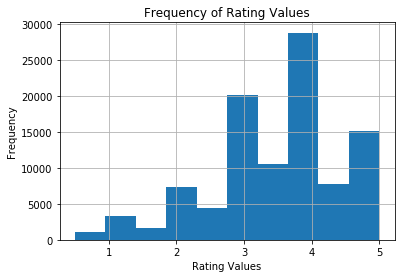

In [247]:
#Question 2
n_unique_ratings=ratings.rating.unique().shape[0]
print(n_unique_ratings)
r_counts=ratings['rating'].value_counts()
r=r_counts.sort_index()
r_counts = ratings['rating'].hist(bins=10)
r_counts.set_title("Frequency of Rating Values")
r_counts.set_xlabel("Rating Values")
r_counts.set_ylabel("Frequency")
#n_unique_ratings.r_counts.age.plot.hist(bins=30)
#plt.title("Distribution of users' ages")
#plt.ylabel('count of users')
#plt.xlabel('age');

Text(0.5,1,'Frequency of Ratings given to movies')

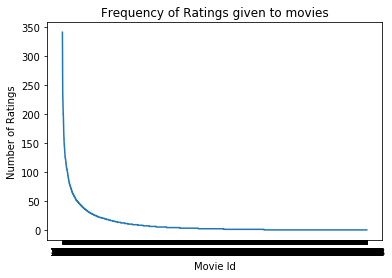

In [248]:
#Question3
movie_counts=ratings['movieId'].value_counts()
movie_ratings = movie_counts.to_dict()
movie_ratings_keys=movie_ratings.keys()
movie_ratings_values=movie_ratings.values()
plt.plot(movie_ratings_values)
plt.xticks(range(len(movie_ratings_values)), movie_ratings_keys)
#plt.yticks(weight='bold', size='large')
plt.xlabel('Movie Id')
plt.ylabel('Number of Ratings')
plt.title('Frequency of Ratings given to movies')

Text(0.5,1,'Frequency of Ratings given by Users')

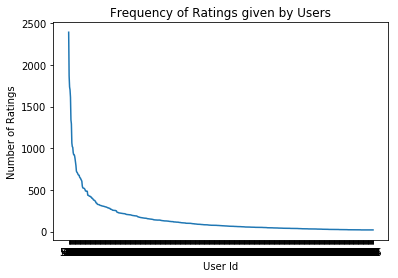

In [249]:
#Question 4
user_counts=ratings['userId'].value_counts()
user_ratings = user_counts.to_dict()
user_ratings_keys=user_ratings.keys()
user_ratings_values=user_ratings.values()
plt.plot(user_ratings_values)
plt.xticks(range(len(user_ratings_values)), user_ratings_keys)
#plt.yticks(weight='bold', size='large')
plt.xlabel('User Id')
plt.ylabel('Number of Ratings')
plt.title('Frequency of Ratings given by Users')


Text(0,0.5,'# Movies')

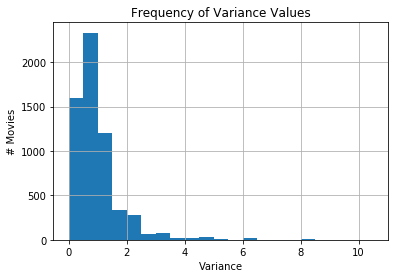

In [250]:
#Question 6
#df1 = df.groupby('userId')['rating'].agg(['count','mean','var']).reset_index()
df = pd.read_csv(r'C:\Users\HPC\Dropbox\Homework\Data Mining\HW\HM3\ml-latest-small\ratings.csv')
df1 = df.groupby('movieId')['rating'].agg(['var']).reset_index()
bin= np.arange(df1['var'].min(), df1['var'].max()+0.5, 0.5)
r_counts = df1['var'].hist(bins=bin)
r_counts.set_title("Frequency of Variance Values")
r_counts.set_xlabel("Variance")
r_counts.set_ylabel("# Movies")

C:\Users\HPC\Dropbox\Homework\Data Mining\HW\HM3\ml-latest-small\ratings.csv
For k value = 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1523
MAE:  0.8925
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1372
MAE:  0.8766
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1445
MAE:  0.8868
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1436
MAE:  0.8841
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1473
MAE:  0.8933
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1280
MAE:  0.8729
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1446
MAE:  0.8887
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1430
MAE:  0.8818
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 

Done computing similarity matrix.
RMSE: 0.9962
MAE:  0.7681
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9818
MAE:  0.7622
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9902
MAE:  0.7692
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9966
MAE:  0.7678
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9994
MAE:  0.7752
For k value = 34
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9926
MAE:  0.7678
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9961
MAE:  0.7675
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9876
MAE:  0.7634
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9856
MAE:  0.7672
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9887
MAE:  0.7

Done computing similarity matrix.
RMSE: 0.9886
MAE:  0.7633
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0007
MAE:  0.7748
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9918
MAE:  0.7682
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9965
MAE:  0.7722
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9907
MAE:  0.7667
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9922
MAE:  0.7713
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9941
MAE:  0.7676
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9957
MAE:  0.7676
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9882
MAE:  0.7703
For k value = 66
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9854
MAE:  0.7

Done computing similarity matrix.
RMSE: 0.9876
MAE:  0.7635
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0163
MAE:  0.7875
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9841
MAE:  0.7582
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9843
MAE:  0.7636
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9871
MAE:  0.7664
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9973
MAE:  0.7702
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9964
MAE:  0.7725
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9825
MAE:  0.7601
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9979
MAE:  0.7686
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9774
MAE:  0.7608
For k value =

Done computing similarity matrix.
RMSE: 0.9898
MAE:  0.7631
For k value = 96
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9937
MAE:  0.7733
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9882
MAE:  0.7611
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9873
MAE:  0.7648
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9992
MAE:  0.7733
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0008
MAE:  0.7763
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9876
MAE:  0.7647
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9940
MAE:  0.7678
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9859
MAE:  0.7609
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0005
MAE:  0.7

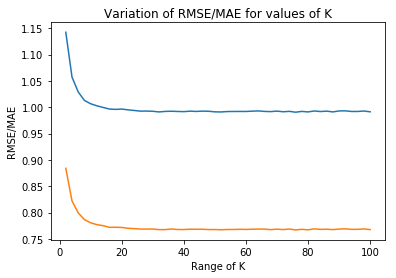

In [251]:
#Question 10,11
file_path= (r'C:\Users\HPC\Dropbox\Homework\Data Mining\HW\HM3\ml-latest-small\ratings.csv');
print(file_path)
# As we're loading a custom dataset, we need to define a reader. In the
# movielens-100k dataset, each line has the following format:
# 'user item rating timestamp', separated by '\t' characters.
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(1, 5), skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
mean=0
mean1=0
mean_rmse=[]
mean_mae=[]
kf = KFold(n_splits=10)
for i in np.arange(2,102,2):
    algo = KNNBasic(k=i, min_k=1,sim_options=sim_options)
    print("For k value = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        mean=mean+accuracy.rmse(predictions, verbose=True)
        mean1=mean1+accuracy.mae(predictions, verbose=True)
    mean_rmse.append(mean/10)
    mean_mae.append(mean1/10)
    mean=0
    mean1=0
    
plt.plot(np.arange(2,102,2),mean_rmse)
plt1.plot(np.arange(2,102,2),mean_mae)
plt.xlabel('Range of K')
plt.ylabel('RMSE/MAE')
plt.title('Variation of RMSE/MAE for values of K')
plt.show()
plt1.show()
   
        

For k value = 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1529
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1382
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1375
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1574
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1369
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1527
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1566
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1276
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1498
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1345
For k value = 4
Computing the pearson similarity matrix...
Done computing similarity

Done computing similarity matrix.
RMSE: 0.9783
For k value = 20
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0029
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0093
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0019
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9840
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9934
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9781
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9996
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0017
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9962
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9834
For k value = 22
Computing the pears

Done computing similarity matrix.
RMSE: 0.9836
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9865
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9953
For k value = 56
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9907
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9855
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9919
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0024
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9925
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0000
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0025
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9836
Computing the pearson similarity mat

Done computing similarity matrix.
RMSE: 0.9935
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9872
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9789
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0013
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0094
For k value = 92
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9965
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9976
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9935
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9965
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9914
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9921
Computing the pearson similarity mat

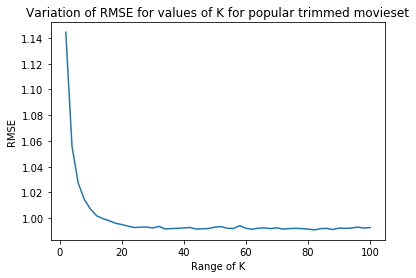

In [252]:
#Question12
def trim(ratings):
   counts1=Counter([val[2] for val in ratings])
   trimmed_data=[val for val in ratings if counts1[val[2]]>2]
   return trimmed_data

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
mean=0
mean_rmse=[]
kf = KFold(n_splits=10)
for i in np.arange(2,102,2):
    algo = KNNBasic(k=i, min_k=1,sim_options=sim_options)
    print("For k value = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(trim(testset))
        mean=mean+accuracy.rmse(predictions, verbose=True)
    mean_rmse.append(mean/10)
    mean=0
    
plt.plot(np.arange(2,102,2),mean_rmse)
plt.xlabel('Range of K')
plt.ylabel('RMSE')
plt.title('Variation of RMSE for values of K for popular trimmed movieset')
plt.show()

For k value = 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1712
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1757
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1943
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1901
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1615
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1557
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1567
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1725
Computing the pearson si

Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1222
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0889
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1156
For k value = 16
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1292
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1142
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0814
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0853
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0954
Computing the pearson similarity matrix...
Done computing similari

Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0968
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1233
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0831
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0996
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0908
For k value = 30
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0971
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0985
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1154
Computing the pearson s

Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1081
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1127
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1034
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0984
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1051
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1091
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0640
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1113
For k value = 44
Computing the pearson similarity matrix...
Done computing similari

Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0857
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0980
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1130
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1057
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1214
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0961
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0766
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1104
Computing the pearson similarity matrix.

Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0717
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0960
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0876
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1200
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1100
For k value = 84
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1326
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0903
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0916
Computing the pearson s

Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1000
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0984
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0934
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1285
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0753
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.1097
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0848
Computing the pearson similarity matrix...
Done computing similarity matrix.
<class 'collections.Counter'>
RMSE: 1.0923
For k value = 98
Computing the pearson similarity matrix...
Done computing similari

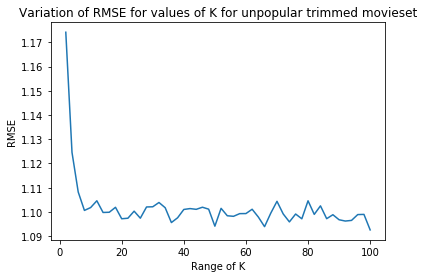

In [253]:
#Question13
def trim(ratings):
   counts1=Counter([val[1] for val in ratings])
   print(type(counts1))
   trimmed_data=[val for val in ratings if counts1[val[1]]<=2]
   return trimmed_data

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
mean=0
mean_rmse=[]
kf = KFold(n_splits=10)
for i in np.arange(2,102,2):
    algo = KNNBasic(k=i, min_k=1,sim_options=sim_options)
    print("For k value = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(trim(testset))
        mean=mean+accuracy.rmse(predictions, verbose=True)
    mean_rmse.append(mean/10)
    #print(mean_rmse)
    mean=0
    
plt.plot(np.arange(2,102,2),mean_rmse)
plt.xlabel('Range of K')
plt.ylabel('RMSE')
plt.title('Variation of RMSE for values of K for unpopular trimmed movieset')
plt.show()

For k value = 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.7121
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.7922
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.7557
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6671
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.7593
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6530
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.7626
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.7410
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.7258
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5665
For k value = 4
Computing the pearson similarity matrix...
Done computing similarity

Done computing similarity matrix.
RMSE: 1.5549
For k value = 20
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5455
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5601
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5957
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5374
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5414
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5484
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6026
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5461
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6425
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5601
For k value = 22
Computing the pears

Done computing similarity matrix.
RMSE: 1.6451
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5776
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5654
For k value = 56
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5905
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5673
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6633
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5719
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5799
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5224
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6041
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5668
Computing the pearson similarity mat

Done computing similarity matrix.
RMSE: 1.5689
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5007
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5869
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4917
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5698
For k value = 92
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6293
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5685
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5615
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6746
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5537
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5368
Computing the pearson similarity mat

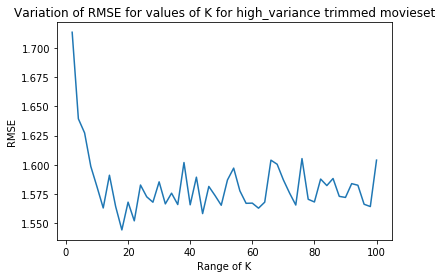

In [254]:
#Question14
def trim(data):
    movie_rating = defaultdict(list)
    for val in data:
        movie_rating[val[1]].append(val[2])
    trim_data = [val for val in data if len(movie_rating[val[1]]) >= 5 and np.var(movie_rating[val[1]]) >= 2.0]
    return trim_data

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
mean=0
mean_rmse=[]
kf = KFold(n_splits=10)
for i in np.arange(2,102,2):
    algo = KNNBasic(k=i, min_k=1,sim_options=sim_options)
    print("For k value = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(trim(testset))
        mean=mean+accuracy.rmse(predictions, verbose=True)
    mean_rmse.append(mean/10)
    #print(mean_rmse)
    mean=0
    
plt.plot(np.arange(2,102,2),mean_rmse)
plt.xlabel('Range of K')
plt.ylabel('RMSE')
plt.title('Variation of RMSE for values of K for high_variance trimmed movieset')
plt.show()

Computing the pearson similarity matrix...
Done computing similarity matrix.
========================For threshold = 2.5===============================


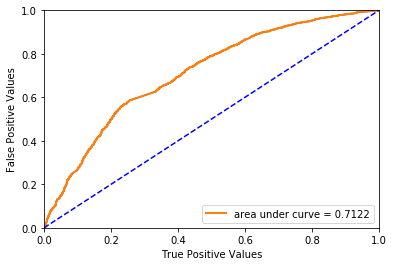

========================For threshold = 3===========================


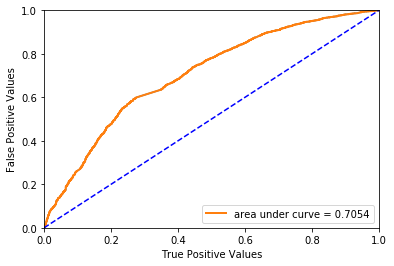

==========================For threshold = 3.5=============================


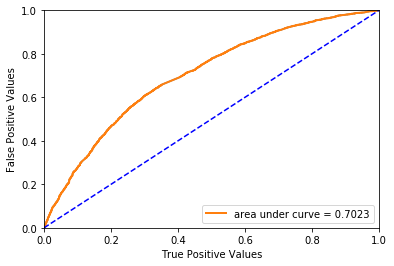

==========================For threshold = 4============================


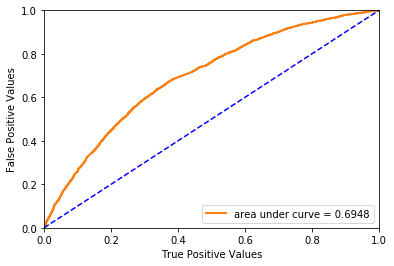

In [256]:
#Question_15
def compute_roc(actual,predicted):
    fpr, tpr, thresholds= roc_curve(actual, predicted)
    aucscore= roc_auc_score(actual, predicted)
    plt.xlabel('True Positive Values')
    plt.ylabel('False Positive Values')
    plt.plot(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % aucscore)
    plt.plot([0, 1], [0, 1],'b--')
    plt.legend(loc = 'lower right')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    return(plt.show())

df1=pd.DataFrame(ratings)
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.10)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
algo = KNNBasic(k=20, min_k=1,sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)

i=0
j=0
k=0
actual=[]
predict=[]
actual_bin=[]

while i<len(predictions):
    actual.append(predictions[i][2])
    i+=1

while j<len(predictions):
    predict.append(predictions[j][3])
    j+=1

actual_array = np.asarray(actual)
actual_predict=np.asarray(predict)

print("========================For threshold = 2.5===============================")
while(k<len(actual_array)):
    if((actual_array[k]>=2.5)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1   
compute_roc(actual_bin,actual_predict)

k=0
actual_bin=[]
while(k<len(actual_array)):
    if((actual_array[k]>=3)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1
print("========================For threshold = 3===========================")   
compute_roc(actual_bin,actual_predict)

k=0
actual_bin=[]
while(k<len(actual_array)):
    if((actual_array[k]>=3.5)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1

print("==========================For threshold = 3.5=============================") 
compute_roc(actual_bin,actual_predict)

k=0
actual_bin=[]
while(k<len(actual_array)):
    if((actual_array[k]>=4)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1

print("==========================For threshold = 4============================") 
compute_roc(actual_bin,actual_predict)

In [ ]:
#Question 17
file_path= (r'C:\Users\HPC\Dropbox\Homework\Data Mining\HW\HM3\ml-latest-small\ratings.csv');
print(file_path)
# As we're loading a custom dataset, we need to define a reader. In the
# movielens-100k dataset, each line has the following format:
# 'user item rating timestamp', separated by '\t' characters.
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(1, 5), skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }

mean=0
mean1=0
mean_rmse=[]
mean_mae=[]
kf = KFold(n_splits=10)
for i in np.arange(2,52,2):
    algo = NMF(n_factors=i)
    print("For n_factors = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        mean=mean+accuracy.rmse(predictions, verbose=True)
        mean1=mean1+accuracy.mae(predictions, verbose=True)
    mean_rmse.append(mean/10)
    mean_mae.append(mean1/10)
    mean=0
    mean1=0
    
plt.plot(np.arange(2,52,2),mean_rmse)
plt1.plot(np.arange(2,52,2),mean_mae)
plt.xlabel('Range of K')
plt.ylabel('RMSE/MAE')
plt.title('Variation of RMSE/MAE for values of K')
plt.show()
plt1.show()

In [ ]:
#Question 19
def trim(ratings):
   counts1=Counter([val[1] for val in ratings])
   trimmed_data=[val for val in ratings if counts1[val[1]]>2]
   return trimmed_data

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
mean=0
mean_rmse=[]
kf = KFold(n_splits=10)
for i in np.arange(2,52,2):
    algo = NMF(n_factors=i)
    print("For n_factors = " + str(i))
    print("For k value = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(trim(testset))
        mean=mean+accuracy.rmse(predictions, verbose=True)
    mean_rmse.append(mean/10)
    #print(mean_rmse)
    mean=0
plt.xlabel('Range of K')
plt.ylabel('RMSE')
plt.title('Variation of RMSE for values of K for popular trimmed movieset')
plt.plot(np.arange(2,52,2),mean_rmse)
plt.show()


For n_factors = 2
For k value = 2
RMSE: 1.1612
RMSE: 1.1625
RMSE: 1.1645
RMSE: 1.1532
RMSE: 1.1660
RMSE: 1.1623
RMSE: 1.1761
RMSE: 1.1704
RMSE: 1.1854
RMSE: 1.1670
For n_factors = 4
For k value = 4
RMSE: 1.0410
RMSE: 1.0300
RMSE: 1.0472
RMSE: 1.0287
RMSE: 1.0508
RMSE: 1.0234
RMSE: 1.0303
RMSE: 1.0276
RMSE: 1.0350
RMSE: 1.0432
For n_factors = 6
For k value = 6
RMSE: 0.9671
RMSE: 0.9608
RMSE: 0.9700
RMSE: 0.9588
RMSE: 0.9657
RMSE: 0.9612
RMSE: 0.9850
RMSE: 0.9876
RMSE: 0.9701
RMSE: 0.9608
For n_factors = 8
For k value = 8
RMSE: 0.9135
RMSE: 0.9334
RMSE: 0.9249
RMSE: 0.9357
RMSE: 0.9378
RMSE: 0.9297
RMSE: 0.9359
RMSE: 0.9369
RMSE: 0.9237
RMSE: 0.9473
For n_factors = 10
For k value = 10
RMSE: 0.9215
RMSE: 0.9084
RMSE: 0.9108
RMSE: 0.9147
RMSE: 0.9146
RMSE: 0.8849
RMSE: 0.9153
RMSE: 0.9146
RMSE: 0.9092
RMSE: 0.9280
For n_factors = 12
For k value = 12
RMSE: 0.9029
RMSE: 0.8809
RMSE: 0.8851
RMSE: 0.8985
RMSE: 0.9240
RMSE: 0.9060
RMSE: 0.8809
RMSE: 0.9038
RMSE: 0.9104
RMSE: 0.9051
For n_factor

In [ ]:
#Question20
def trim(ratings):
   counts1=Counter([val[1] for val in ratings])
   trimmed_data=[val for val in ratings if counts1[val[1]]<=2]
   return trimmed_data

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
mean=0
mean_rmse=[]
kf = KFold(n_splits=10)
for i in np.arange(2,52,2):
    algo = NMF(n_factors=i)
    print("For n_factors = " + str(i))
    print("For k value = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(trim(testset))
        mean=mean+accuracy.rmse(predictions, verbose=True)
    mean_rmse.append(mean/10)
    #print(mean_rmse)
    mean=0
plt.xlabel('Range of K')
plt.ylabel('RMSE')
plt.title('Variation of RMSE for values of K for unpopular trimmed movieset')
plt.plot(np.arange(2,52,2),mean_rmse)
plt.show()

In [1]:
#Question 21
def trim(data):
    movie_rating = defaultdict(list)
    for val in data:
        movie_rating[val[1]].append(val[2])
    trim_data = [val for val in data if len(movie_rating[val[1]]) >= 5 and np.var(movie_rating[val[1]]) >= 2.0]
    return trim_data

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
mean=0
mean_rmse=[]
kf = KFold(n_splits=10)
for i in np.arange(2,52,2):
    algo = NMF(n_factors=i)
    print("For n_factors = " + str(i))
    print("For k value = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(trim(testset))
        mean=mean+accuracy.rmse(predictions, verbose=True)
    mean_rmse.append(mean/10)
    #print(mean_rmse)
    mean=0
plt.xlabel('Range of K')
plt.ylabel('RMSE')
plt.title('Variation of RMSE for values of K for high popular trimmed movieset')
plt.plot(np.arange(2,52,2),mean_rmse)
plt.show()

NameError: name 'pd' is not defined

In [ ]:
#Question 22
df1=pd.DataFrame(ratings)
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.10)
algo = NMF(n_factors=15)
algo.fit(trainset)
predictions = algo.test(testset)

i=0
j=0
k=0
actual=[]
predict=[]
actual_bin=[]

while i<len(predictions):
    actual.append(predictions[i][2])
    i+=1

while j<len(predictions):
    predict.append(predictions[j][3])
    j+=1

actual_array = np.asarray(actual)
actual_predict=np.asarray(predict)

print("========================For threshold = 2.5===============================")
while(k<len(actual_array)):
    if((actual_array[k]>=2.5)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1

   
compute_roc(actual_bin,actual_predict)
k=0
actual_bin=[]
while(k<len(actual_array)):
    if((actual_array[k]>=3)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1

print("========================For threshold = 3.5===========================")   
compute_roc(actual_bin,actual_predict)
k=0
actual_bin=[]
while(k<len(actual_array)):
    if((actual_array[k]>=3.5)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1

print("==========================For threshold = 4=============================") 

compute_roc(actual_bin,actual_predict)
k=0
actual_bin=[]
while(k<len(actual_array)):
    if((actual_array[k]>=4)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1

print("==========================For threshold = 4.5============================") 
compute_roc(actual_bin,actual_predict)

In [62]:
#Question 23
df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.1)
algo = NMF(n_factors=20)
algo.fit(trainset)
U=algo.pu
V=algo.qi
print(type(U))
top_10_movies = [trainset.to_raw_iid(i) for i in np.argsort(V[:,0])[::-1][:10]]
movies = pd.read_csv(r'C:\Users\HPC\Dropbox\Homework\Data Mining\HW\HM3\ml-latest-small\movies.csv')
G=[]
for movieid in top_10_movies:  print(movies.loc[movies['movieId'] == movieid]['genres'])

<class 'numpy.ndarray'>
7621    Drama|Romance
Name: genres, dtype: object
251    Drama
Name: genres, dtype: object
8450    Children|Drama|War
Name: genres, dtype: object
3091    Comedy|Documentary
Name: genres, dtype: object
6521    Drama|Fantasy|Romance
Name: genres, dtype: object
6990    Comedy|Drama|Romance
Name: genres, dtype: object
6783    Action|Adventure|Animation|Crime|Fantasy
Name: genres, dtype: object
6729    Comedy
Name: genres, dtype: object
7599    Action|Adventure|Thriller
Name: genres, dtype: object
1966    Horror
Name: genres, dtype: object


C:\Users\HPC\Dropbox\Homework\Data Mining\HW\HM3\ml-latest-small\ratings.csv
For n_factors = 2
RMSE: 0.8906
MAE:  0.6869
RMSE: 0.8941
MAE:  0.6892
RMSE: 0.8873
MAE:  0.6863
RMSE: 0.8883
MAE:  0.6867
RMSE: 0.8744
MAE:  0.6767
RMSE: 0.8761
MAE:  0.6785
RMSE: 0.8814
MAE:  0.6796
RMSE: 0.8904
MAE:  0.6836
RMSE: 0.8997
MAE:  0.6889
RMSE: 0.8923
MAE:  0.6861
For n_factors = 4
RMSE: 0.8888
MAE:  0.6838
RMSE: 0.8697
MAE:  0.6714
RMSE: 0.8942
MAE:  0.6905
RMSE: 0.8927
MAE:  0.6897
RMSE: 0.8844
MAE:  0.6812
RMSE: 0.8946
MAE:  0.6914
RMSE: 0.8830
MAE:  0.6789
RMSE: 0.8947
MAE:  0.6883
RMSE: 0.8921
MAE:  0.6871
RMSE: 0.8869
MAE:  0.6810
For n_factors = 6
RMSE: 0.8905
MAE:  0.6813
RMSE: 0.8823
MAE:  0.6814
RMSE: 0.8846
MAE:  0.6833
RMSE: 0.8944
MAE:  0.6911
RMSE: 0.8962
MAE:  0.6889
RMSE: 0.8806
MAE:  0.6812
RMSE: 0.8861
MAE:  0.6803
RMSE: 0.8873
MAE:  0.6849
RMSE: 0.8772
MAE:  0.6735
RMSE: 0.9002
MAE:  0.6939
For n_factors = 8
RMSE: 0.8816
MAE:  0.6791
RMSE: 0.8854
MAE:  0.6803
RMSE: 0.8897
MAE:  

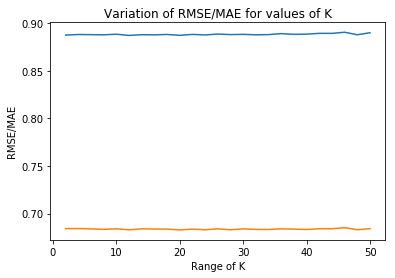

In [257]:
#Question 24
file_path=(r'C:\Users\HPC\Dropbox\Homework\Data Mining\HW\HM3\ml-latest-small\ratings.csv')
print(file_path)
# As we're loading a custom dataset, we need to define a reader. In the
# movielens-100k dataset, each line has the following format:
# 'user item rating timestamp', separated by '\t' characters.
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(1, 5), skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }

mean=0
mean1=0
mean_rmse=[]
mean_mae=[]
kf = KFold(n_splits=10)
for i in np.arange(2,52,2):
    algo = SVD(n_factors=i)
    print("For n_factors = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        mean=mean+accuracy.rmse(predictions, verbose=True)
        mean1=mean1+accuracy.mae(predictions, verbose=True)
    mean_rmse.append(mean/10)
    mean_mae.append(mean1/10)
    mean=0
    mean1=0
    
plt.plot(np.arange(2,52,2),mean_rmse)
plt1.plot(np.arange(2,52,2),mean_mae)
plt.xlabel('Range of K')
plt.ylabel('RMSE/MAE')
plt.title('Variation of RMSE/MAE for values of K')
plt.show()


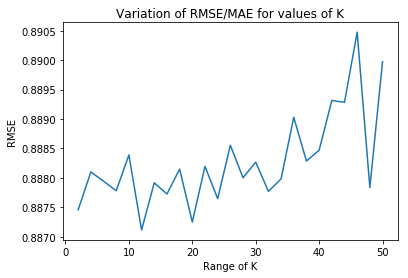

In [258]:
plt.plot(np.arange(2,52,2),mean_rmse)
plt.xlabel('Range of K')
plt.ylabel('RMSE')
plt.title('Variation of RMSE for values of K')
plt.show()


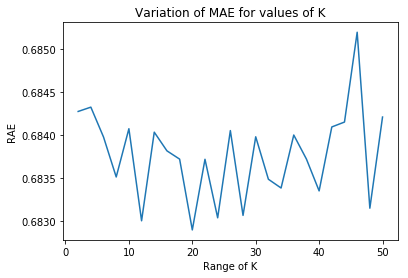

In [259]:
plt.plot(np.arange(2,52,2),mean_mae)
plt.xlabel('Range of K')
plt.ylabel('RAE')
plt.title('Variation of MAE for values of K')
plt.show()


For n_factors = 2
For k value = 2
RMSE: 0.8729
RMSE: 0.8637
RMSE: 0.8595
RMSE: 0.8660
RMSE: 0.8601
RMSE: 0.8714
RMSE: 0.8686
RMSE: 0.8706
RMSE: 0.8681
RMSE: 0.8700
For n_factors = 4
For k value = 4
RMSE: 0.8670
RMSE: 0.8522
RMSE: 0.8580
RMSE: 0.8604
RMSE: 0.8602
RMSE: 0.8879
RMSE: 0.8790
RMSE: 0.8693
RMSE: 0.8696
RMSE: 0.8695
For n_factors = 6
For k value = 6
RMSE: 0.8629
RMSE: 0.8650
RMSE: 0.8599
RMSE: 0.8646
RMSE: 0.8589
RMSE: 0.8638
RMSE: 0.8636
RMSE: 0.8825
RMSE: 0.8574
RMSE: 0.8750
For n_factors = 8
For k value = 8
RMSE: 0.8625
RMSE: 0.8515
RMSE: 0.8787
RMSE: 0.8637
RMSE: 0.8632
RMSE: 0.8601
RMSE: 0.8593
RMSE: 0.8666
RMSE: 0.8686
RMSE: 0.8737
For n_factors = 10
For k value = 10
RMSE: 0.8806
RMSE: 0.8731
RMSE: 0.8733
RMSE: 0.8704
RMSE: 0.8645
RMSE: 0.8577
RMSE: 0.8754
RMSE: 0.8687
RMSE: 0.8499
RMSE: 0.8619
For n_factors = 12
For k value = 12
RMSE: 0.8697
RMSE: 0.8594
RMSE: 0.8585
RMSE: 0.8638
RMSE: 0.8745
RMSE: 0.8642
RMSE: 0.8641
RMSE: 0.8668
RMSE: 0.8618
RMSE: 0.8764
For n_factor

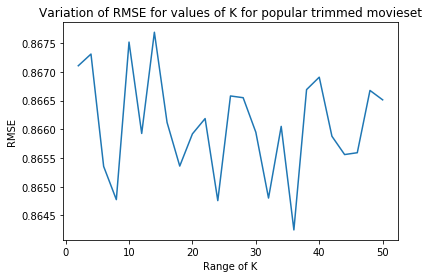

In [260]:
#Question 26
def trim(ratings):
   counts1=Counter([val[1] for val in ratings])
   trimmed_data=[val for val in ratings if counts1[val[1]]>2]
   return trimmed_data

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
mean=0
mean_rmse=[]
kf = KFold(n_splits=10)
for i in np.arange(2,52,2):
    algo = SVD(n_factors=i)
    print("For n_factors = " + str(i))
    print("For k value = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(trim(testset))
        mean=mean+accuracy.rmse(predictions, verbose=True)
    mean_rmse.append(mean/10)
    #print(mean_rmse)
    mean=0
plt.xlabel('Range of K')
plt.ylabel('RMSE')
plt.title('Variation of RMSE for values of K for popular trimmed movieset')
plt.plot(np.arange(2,52,2),mean_rmse)
plt.show()


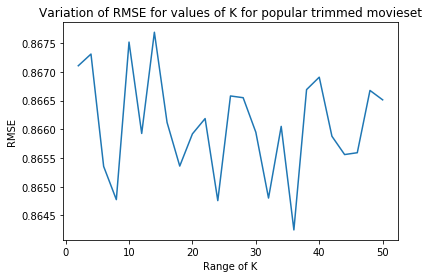

In [262]:
plt.xlabel('Range of K')
plt.ylabel('RMSE')
plt.title('Variation of RMSE for values of K for popular trimmed movieset')
plt.plot(np.arange(2,52,2),mean_rmse)
plt.show()

In [ ]:
#Question27
def trim(ratings):
   counts1=Counter([val[1] for val in ratings])
   trimmed_data=[val for val in ratings if counts1[val[1]]<=2]
   return trimmed_data

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
mean=0
mean_rmse=[]
kf = KFold(n_splits=10)
for i in np.arange(2,52,2):
    algo = SVD(n_factors=i)
    print("For n_factors = " + str(i))
    print("For k value = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(trim(testset))
        mean=mean+accuracy.rmse(predictions, verbose=True)
    mean_rmse.append(mean/10)
    #print(mean_rmse)
    mean=0
plt.xlabel('Range of K')
plt.ylabel('RMSE')
plt.title('Variation of RMSE for values of K for unpopular trimmed movieset')
plt.plot(np.arange(2,52,2),mean_rmse)
plt.show()

In [ ]:
#Question 28
def trim(data):
    movie_rating = defaultdict(list)
    for val in data:
        movie_rating[val[1]].append(val[2])
    trim_data = [val for val in data if len(movie_rating[val[1]]) >= 5 and np.var(movie_rating[val[1]]) >= 2.0]
    return trim_data

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
mean=0
mean_rmse=[]
kf = KFold(n_splits=10)
for i in np.arange(2,52,2):
    algo = SVD(n_factors=i)
    print("For n_factors = " + str(i))
    print("For k value = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(trim(testset))
        mean=mean+accuracy.rmse(predictions, verbose=True)
    mean_rmse.append(mean/10)
    #print(mean_rmse)
    mean=0
plt.xlabel('Range of K')
plt.ylabel('RMSE')
plt.title('Variation of RMSE for values of K for high popular trimmed movieset')
plt.plot(np.arange(2,52,2),mean_rmse)
plt.show()

========================For threshold = 2.5===============================


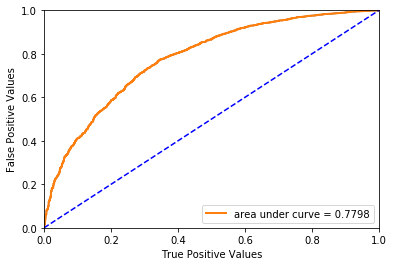

========================For threshold = 3===========================


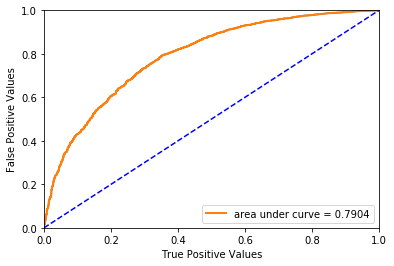

==========================For threshold = 3.5=============================


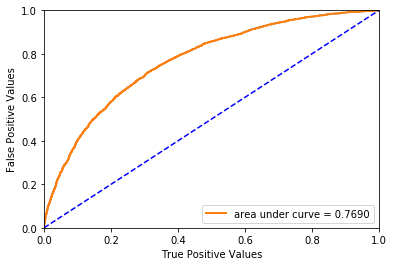

==========================For threshold = 4============================


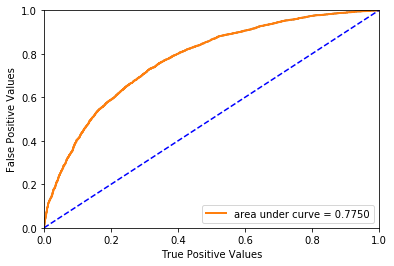

In [261]:
# Question 29
def compute_roc(actual,predicted):
    fpr, tpr, thresholds= roc_curve(actual, predicted)
    aucscore= roc_auc_score(actual, predicted)
    plt.xlabel('True Positive Values')
    plt.ylabel('False Positive Values')
    plt.plot(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % aucscore)
    plt.plot([0, 1], [0, 1],'b--')
    plt.legend(loc = 'lower right')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    return(plt.show())

df1=pd.DataFrame(ratings)
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.10)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
algo = SVD(n_factors=20)
algo.fit(trainset)
predictions = algo.test(testset)

i=0
j=0
k=0
actual=[]
predict=[]
actual_bin=[]

while i<len(predictions):
    actual.append(predictions[i][2])
    i+=1

while j<len(predictions):
    predict.append(predictions[j][3])
    j+=1

actual_array = np.asarray(actual)
actual_predict=np.asarray(predict)

print("========================For threshold = 2.5===============================")
while(k<len(actual_array)):
    if((actual_array[k]>=2.5)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1   
compute_roc(actual_bin,actual_predict)

k=0
actual_bin=[]
while(k<len(actual_array)):
    if((actual_array[k]>=3)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1
print("========================For threshold = 3===========================")   
compute_roc(actual_bin,actual_predict)

k=0
actual_bin=[]
while(k<len(actual_array)):
    if((actual_array[k]>=3.5)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1

print("==========================For threshold = 3.5=============================") 
compute_roc(actual_bin,actual_predict)

k=0
actual_bin=[]
while(k<len(actual_array)):
    if((actual_array[k]>=4)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1

print("==========================For threshold = 4============================") 
compute_roc(actual_bin,actual_predict)




In [236]:
#Question 30
df = pd.DataFrame({'itemID': list(ratings.movieId), 'userID': list(ratings.userId), 'rating': list(ratings.rating)}) 
avg_rate = df.groupby(['userID'])['rating'].mean().tolist()
def naive_prediction(TEST):
    predictions = [avg_rate[TEST[i][0]-1] for i in range(len(TEST))]
    return predictions

k_rmse = []
kf = KFold(n_splits=10)
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
for trainset, testset in kf.split(data):
    predict_Y= naive_prediction(testset)
    TRUE_Y = [testset[i][2] for i in range(len(testset))]
    k_rmse.append(mean_squared_error(TRUE_Y,predict_Y))
rmse_MEAN= np.mean(k_rmse)
print('The average RMSE (naive collaborative filter) is %0.3f'%rmse_MEAN)


The average RMSE (naive collaborative filter) is 0.913


In [237]:
#Question 31
df = pd.DataFrame({'itemID': list(ratings.movieId), 'userID': list(ratings.userId), 'rating': list(ratings.rating)}) 
avg_rate = df.groupby(['userID'])['rating'].mean().tolist()
def naive_prediction(TEST):
    predictions = [avg_rate[TEST[i][0]-1] for i in range(len(TEST))]
    return predictions

def trim(ratings):
   counts1=Counter([val[1] for val in ratings])
   trimmed_data=[val for val in ratings if counts1[val[1]]>2]
   return trimmed_data


k_rmse = []
kf = KFold(n_splits=10)
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
for trainset, testset in kf.split(data):
    AA=trim(testset)
    predict_Y= naive_prediction(AA)
    TRUE_Y = [AA[i][2] for i in range(len(AA))]
    k_rmse.append(mean_squared_error(TRUE_Y,predict_Y))
rmse_MEAN= np.mean(k_rmse)
print('The average RMSE (naive collaborative filter, Popular Movies) is %0.3f'%rmse_MEAN)

The average RMSE (naive collaborative filter, Popular Movies) is 0.887


In [238]:
#Question 32
df = pd.DataFrame({'itemID': list(ratings.movieId), 'userID': list(ratings.userId), 'rating': list(ratings.rating)}) 
avg_rate = df.groupby(['userID'])['rating'].mean().tolist()
def naive_prediction(TEST):
    predictions = [avg_rate[TEST[i][0]-1] for i in range(len(TEST))]
    return predictions

def trim(ratings):
   counts1=Counter([val[1] for val in ratings])
   trimmed_data=[val for val in ratings if counts1[val[1]]<=2]
   return trimmed_data


k_rmse = []
kf = KFold(n_splits=10)
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
for trainset, testset in kf.split(data):
    AA=trim(testset)
    predict_Y= naive_prediction(AA)
    TRUE_Y = [AA[i][2] for i in range(len(AA))]
    k_rmse.append(mean_squared_error(TRUE_Y,predict_Y))
rmse_MEAN= np.mean(k_rmse)
print('The average RMSE (naive collaborative filter, Unpopular Movies) is %0.3f'%rmse_MEAN)

The average RMSE (naive collaborative filter, Unpopular Movies) is 0.973


In [239]:
#Question 33
df = pd.DataFrame({'itemID': list(ratings.movieId), 'userID': list(ratings.userId), 'rating': list(ratings.rating)}) 
avg_rate = df.groupby(['userID'])['rating'].mean().tolist()
def naive_prediction(TEST):
    predictions = [avg_rate[TEST[i][0]-1] for i in range(len(TEST))]
    return predictions

def trim(data):
    movie_rating = defaultdict(list)
    for val in data:
        movie_rating[val[1]].append(val[2])
    trim_data = [val for val in data if len(movie_rating[val[1]]) >= 5 and np.var(movie_rating[val[1]]) >= 2.0]
    return trim_data

k_rmse = []
kf = KFold(n_splits=10)
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
for trainset, testset in kf.split(data):
    AA=trim(testset)
    predict_Y= naive_prediction(AA)
    TRUE_Y = [AA[i][2] for i in range(len(AA))]
    k_rmse.append(mean_squared_error(TRUE_Y,predict_Y))
rmse_MEAN= np.mean(k_rmse)
print('The average RMSE (naive collaborative filter, High Variance) is %0.3f'%rmse_MEAN)

The average RMSE (naive collaborative filter, High Variance) is 2.040


In [ ]:
#Question 34
def compute_roc(actual,predicted):
    fpr, tpr, thresholds= roc_curve(actual, predicted)
    aucscore= roc_auc_score(actual, predicted)
    plt.xlabel('True Positive Values')
    plt.ylabel('False Positive Values')
    plt.plot(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % aucscore)
    plt.plot([0, 1], [0, 1],'b--')
    plt.legend(loc = 'lower right')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    return(plt.show())

df1=pd.DataFrame(ratings)
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.10)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
algo = KNNBasic(k=20, min_k=1,sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)

i=0
j=0
k=0
actual=[]
predict=[]
actual_bin=[]

while i<len(predictions):
    actual.append(predictions[i][2])
    i+=1

while j<len(predictions):
    predict.append(predictions[j][3])
    j+=1

actual_array = np.asarray(actual)
actual_predict=np.asarray(predict)

print("========================For threshold = 3===============================")
while(k<len(actual_array)):
    if((actual_array[k]>=3)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1   
plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(actual_bin,actual_predict)
auc = metrics.roc_auc_score(actual_bin,actual_predict)
plt.plot(fpr,tpr,label="KNN, auc="+str(auc))    
    

df1=pd.DataFrame(ratings)
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.10)
algo = NMF(n_factors=12)
algo.fit(trainset)
predictions = algo.test(testset)

i=0
j=0
k=0
actual=[]
predict=[]
actual_bin=[]

while i<len(predictions):
    actual.append(predictions[i][2])
    i+=1

while j<len(predictions):
    predict.append(predictions[j][3])
    j+=1

actual_array = np.asarray(actual)
actual_predict=np.asarray(predict)

print("========================For threshold = 3===============================")
while(k<len(actual_array)):
    if((actual_array[k]>=3)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1

fpr, tpr, thresh = metrics.roc_curve(actual_bin,actual_predict)
auc = metrics.roc_auc_score(actual_bin,actual_predict)
plt.plot(fpr,tpr,label="NMF, auc="+str(auc))    

    
df1=pd.DataFrame(ratings)
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.10)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
algo = SVD(n_factors=20)
algo.fit(trainset)
predictions = algo.test(testset)

i=0
j=0
k=0
actual=[]
predict=[]
actual_bin=[]

while i<len(predictions):
    actual.append(predictions[i][2])
    i+=1

while j<len(predictions):
    predict.append(predictions[j][3])
    j+=1

actual_array = np.asarray(actual)
actual_predict=np.asarray(predict)

print("========================For threshold = 3===============================")
while(k<len(actual_array)):
    if((actual_array[k]>=3)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1   

fpr, tpr, thresh = metrics.roc_curve(actual_bin,actual_predict)
auc = metrics.roc_auc_score(actual_bin,actual_predict)
plt.plot(fpr,tpr,label="MF with bias, auc="+str(auc))    


plt.xlabel('True Positive Values')
plt.ylabel('False Positive Values')


plt.legend(loc=0)

In [ ]:
#Question 36

def precision_recall_at_k(predictions, k, threshold):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1
    return precisions, recalls

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }

kf = KFold(n_splits=10)
algo = KNNBasic(k=20, min_k=1)
p_knn =[]
r_knn =[]
prec=[]
rec=[]
for t in range(1,26):
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        precisions, recalls = precision_recall_at_k(predictions, k=t, threshold = 3)
        prec.append(sum(i for i in precisions.values()) / len(precisions))
        rec.append(sum(rec for rec in recalls.values()) / len(recalls))
    pr1 = np.mean(prec)
    re1 = np.mean(rec)
    p_knn.append(pr1)
    r_knn.append(re1)

plt.xlabel('t values')
plt.ylabel('Precision')
plt.title('Variation of average precision against t values')
plt.plot(np.arange(1,26,1),p_knn)
plt.show()

plt.xlabel('t values')
plt.ylabel('Recall')
plt.title('Variation of average recall against t values')
plt.plot(np.arange(1,26,1),r_knn)
plt.show()

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve')
plt.plot(r_knn,p_knn)
plt.show()


In [ ]:
#Question 37

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)

kf = KFold(n_splits=10)
algo = NMF(n_factors= 12)
p_nmf =[]
r_nmf =[]
prec=[]
rec=[]
for t in range(1,26):
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        precisions, recalls = precision_recall_at_k(predictions, k=t, threshold = 3)
        prec.append(sum(i for i in precisions.values()) / len(precisions))
        rec.append(sum(rec for rec in recalls.values()) / len(recalls))
    pr1 = np.mean(prec)
    re1 = np.mean(rec)
    p_nmf.append(pr1)
    r_nmf.append(re1)
    
plt.xlabel('t values')
plt.ylabel('Precision')
plt.title('Variation of average precision against t values')
plt.plot(np.arange(1,26,1),p_nmf)
plt.show()

plt.xlabel('t values')
plt.ylabel('Recall')
plt.title('Variation of average recall against t values')
plt.plot(np.arange(1,26,1),r_nmf)
plt.show()

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve')
plt.plot(r_nmf,p_nmf)
plt.show()

In [ ]:
#Question 38

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)

kf = KFold(n_splits=10)
algo = SVD(n_factors=20)
p_svd =[]
r_svd =[]
prec=[]
rec=[]
for t in range(1,26):
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        precisions, recalls = precision_recall_at_k(predictions, k=t, threshold = 3)
        prec.append(sum(i for i in precisions.values()) / len(precisions))
        rec.append(sum(rec for rec in recalls.values()) / len(recalls))
    pr1 = np.mean(prec)
    re1 = np.mean(rec)
    p_svd.append(pr1)
    r_svd.append(re1)

plt.xlabel('t values')
plt.ylabel('Precision')
plt.title('Variation of average precision against t values')
plt.plot(np.arange(1,26,1),p_svd)
plt.show()

plt.xlabel('t values')
plt.ylabel('Recall')
plt.title('Variation of average recall against t values')
plt.plot(np.arange(1,26,1),r_svd)
plt.show()

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve')
plt.plot(r_svd,p_svd)
plt.show()

In [ ]:
#Question 39
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curves for all methods')
line1 = plt.plot(r_knn,p_knn, label="Line 1")
line2 = plt.plot(r_nmf,p_nmf, label="Line 2")
line3 = plt.plot(r_svd,p_svd, label="Line 3")
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["PR curve for knn","PR curve for NMF","PR curve for MF"] )
plt.show()